# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
%config Completer.use_jedi = False

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [6]:
online_rt = pd.read_csv('Online_Retail.csv', encoding='latin1', parse_dates=['InvoiceDate'])

In [7]:
online_rt.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
online_rt.InvoiceDate.iloc[0]

Timestamp('2010-12-01 08:26:00')

### Step 4. Create a bar chart with the 10 countries that have the most 'Quantity' ordered except UK

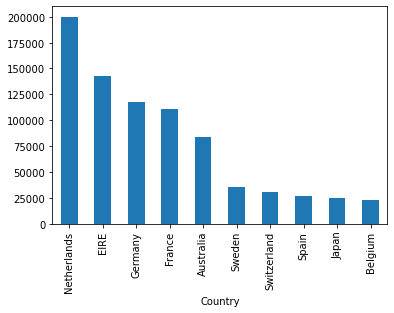

In [14]:
online_rt.query("Country != 'United Kingdom'").groupby('Country').Quantity.sum().nlargest(10).plot(kind='bar');

### Step 5.  Exclude negative Quantity entries

In [16]:
online_rt_2 = online_rt.query("Quantity >= 0")

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

In [27]:
online_rt_top_3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
385,536403,22867,HAND WARMER BIRD DESIGN,96,2010-12-01 11:27:00,1.85,12791.0,Netherlands
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662.0,Germany
...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany


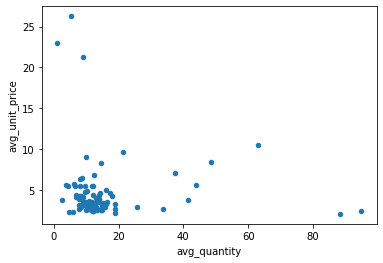

In [29]:
top_3 = online_rt_2.query("Country != 'United Kingdom'").groupby('Country').Quantity.sum().nlargest(3).index.tolist()
online_rt_top_3 = online_rt_2.query("Country in @top_3")

online_rt_top_3.groupby('CustomerID').agg(avg_quantity=('Quantity', 'mean'), 
                                          avg_unit_price=('UnitPrice', 'mean')).plot(kind='scatter', x='avg_quantity', 
                                                                                     y='avg_unit_price');

# sns.scatterplot(data=online_rt_top_3, x='Quantity', y='UnitPrice');

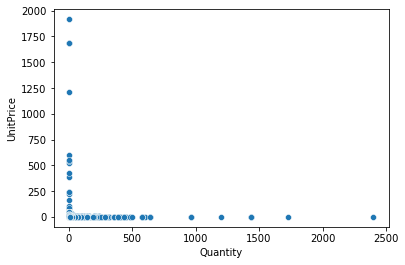

In [24]:
# Alternative solution
top_3 = online_rt_2.query("Country != 'United Kingdom'").groupby('Country').Quantity.sum().nlargest(3).index.tolist()
online_rt_top_3 = online_rt_2.query("Country in @top_3")

# online_rt_top_3.plot(kind='scatter', x='Quantity', y='UnitPrice');
sns.scatterplot(data=online_rt_top_3, x='Quantity', y='UnitPrice');

### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [30]:
online_rt_2.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [36]:
online_rt_2.UnitPrice.dtype

dtype('float64')

##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [40]:
# online_rt_2[online_rt_2.CustomerID.isin([12346.0, 12347.0])]

In [45]:
online_rt_2.query("CustomerID in [12346.0, 12347.0]").sort_values('CustomerID')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland
286635,562032,84991,60 TEATIME FAIRY CAKE CASES,24,2011-08-02 08:48:00,0.55,12347.0,Iceland
286636,562032,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2011-08-02 08:48:00,0.55,12347.0,Iceland
286637,562032,22423,REGENCY CAKESTAND 3 TIER,3,2011-08-02 08:48:00,12.75,12347.0,Iceland
...,...,...,...,...,...,...,...,...
148288,549222,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-04-07 10:43:00,4.25,12347.0,Iceland
148289,549222,20665,RED RETROSPOT PURSE,6,2011-04-07 10:43:00,2.95,12347.0,Iceland
148290,549222,23076,ICE CREAM SUNDAE LIP GLOSS,240,2011-04-07 10:43:00,1.04,12347.0,Iceland
148292,549222,22550,HOLIDAY FUN LUDO,8,2011-04-07 10:43:00,3.75,12347.0,Iceland


In [51]:
online_rt_2.query("CustomerID in [12347.0]").Quantity.sum()

2458

#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [52]:
top_3

['Netherlands', 'EIRE', 'Germany']

##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [54]:
# online_rt_top_3['Revenue'] = online_rt_top_3.UnitPrice * online_rt_top_3.Quantity
online_rt_top_3['Revenue'] = online_rt_top_3.eval("UnitPrice * Quantity")
online_rt_top_3.head(3)

/opt/anaconda3/envs/nmtruong/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
385,536403,22867,HAND WARMER BIRD DESIGN,96,2010-12-01 11:27:00,1.85,12791.0,Netherlands,177.6
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands,15.0
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany,17.7


##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

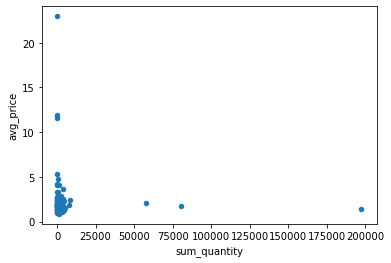

In [57]:
sale = online_rt_top_3.groupby(['CustomerID', 'Country']).agg(sum_quantity=('Quantity', 'sum'),
                                                               sum_revenue=('Revenue', 'sum'))
sale['avg_price'] = sale.sum_revenue / sale.sum_quantity

sale.plot(kind='scatter', x='sum_quantity', y='avg_price');

##### Step 7.3.3 Plot

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

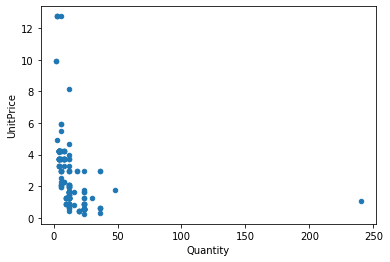

In [58]:
online_rt_2.query("CustomerID == 12347.0").plot(kind='scatter', x='Quantity', y='UnitPrice');

##### Step 7.4.2 Zoom in so we can see that curve more clearly

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

In [68]:
range_unit_price = int((online_rt_top_3.UnitPrice.max() - online_rt_top_3.UnitPrice.min()) / 50 + 1)
range_unit_price

39

/opt/anaconda3/envs/nmtruong/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


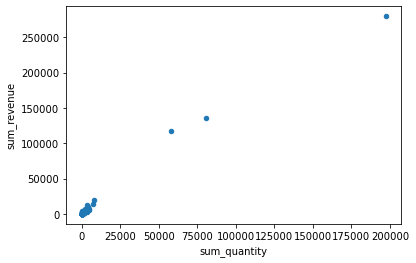

In [85]:
online_rt_top_3['bin_unit_price'] = pd.cut(online_rt_top_3.UnitPrice, bins=range_unit_price, 
                                           right=False, include_lowest=True, labels=range(39))
online_rt_top_3.groupby(['CustomerID', 'Country', 'bin_unit_price']).agg(sum_quantity=('Quantity', 'sum'),
                                                                     sum_revenue=('Revenue', 'sum')).plot(kind='scatter', 
                                                                                                          x='sum_quantity',
                                                                                                          y='sum_revenue');

#### 8.3 Plot.

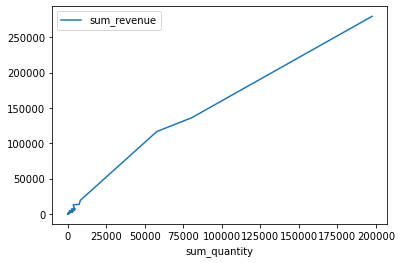

In [83]:
online_rt_top_3.query("UnitPrice < 50").groupby(['CustomerID', 'Country']).\
agg(sum_quantity=('Quantity', 'sum'),
    sum_revenue=('Revenue', 'sum')).sort_values(by='sum_revenue').plot( 
                                                                  x='sum_quantity',
                                                                  y='sum_revenue');

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

### BONUS: Create your own question and answer it.

In [87]:
online_rt.query("Country == 'United Kingdom' and Quantity > 10")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom
82,536376,22114,HOT WATER BOTTLE TEA AND SYMPATHY,48,2010-12-01 09:32:00,3.45,15291.0,United Kingdom
83,536376,21733,RED HANGING HEART T-LIGHT HOLDER,64,2010-12-01 09:32:00,2.55,15291.0,United Kingdom
...,...,...,...,...,...,...,...,...
541886,581585,22398,MAGNETS PACK OF 4 SWALLOWS,12,2011-12-09 12:31:00,0.39,15804.0,United Kingdom
541888,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-12-09 12:31:00,0.95,15804.0,United Kingdom
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
